In [87]:
import numpy as np
import pandas as pd
import datetime

# Loading Data

In [88]:
inp = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')
inp.drop(['Tax 5%', 'Total', 'cogs', 'gross income', 'Branch', 'Invoice ID'], axis=1, inplace=True)
inp['Tax percentage'] = 5

In [89]:
inp.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,gross margin percentage,Rating,Tax percentage
0,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,4.761905,9.1,5
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,4.761905,9.6,5
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,4.761905,7.4,5
3,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,4.761905,8.4,5
4,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,4.761905,5.3,5


# Helpful functions

In [90]:
inp['Price incl. Tax'] = inp['Unit price'] * (1+(inp['Tax percentage']/100))
inp['Customer total'] = inp['Price incl. Tax'] * inp['Quantity']
inp['Market total'] = inp['Unit price'] * inp['Quantity']
inp['Unit profit'] = (inp['Unit price'] * ((inp['gross margin percentage']/100)))
inp['COGS'] = (inp['Unit price'] - inp['Unit profit']) * inp['Quantity']
inp['Profit'] = inp['Market total'] - inp['COGS']
inp['Tax total'] = inp['Market total'] - inp['COGS']
inp['Week'] = pd.DataFrame(pd.DatetimeIndex(inp['Date']).isocalendar().week).reset_index()['week']
inp['Month'] = pd.DatetimeIndex(inp['Date']).month_name()
inp['Year'] = pd.DatetimeIndex(inp['Date']).year
inp['Cum sales'] = inp['Market total'].cumsum()
inp['Cum Quantity'] = inp['Quantity'].cumsum()
inp['City'] = inp['City'].replace(['Naypyitaw'], 'Naypyidaw')
output = inp.round(2)
pd.set_option("display.max_rows", None, "display.max_columns", None)
output.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,gross margin percentage,Rating,Tax percentage,Price incl. Tax,Customer total,Market total,Unit profit,COGS,Profit,Tax total,Week,Month,Year,Cum sales,Cum Quantity
0,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,4.76,9.1,5,78.42,548.97,522.83,3.56,497.93,24.90,24.90,1,January,2019,522.83,7
1,Naypyidaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,4.76,9.6,5,16.04,80.22,76.40,0.73,72.76,3.64,3.64,10,March,2019,599.23,12
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,4.76,7.4,5,48.65,340.53,324.31,2.21,308.87,15.44,15.44,9,March,2019,923.54,19
3,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,4.76,8.4,5,61.13,489.05,465.76,2.77,443.58,22.18,22.18,4,January,2019,1389.30,27
4,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,4.76,5.3,5,90.63,634.38,604.17,4.11,575.40,28.77,28.77,6,February,2019,1993.47,34


# Putting it all together

In [91]:
def total(path):
    
    # Extract file
    print('Extracting file...')
    
    inp = pd.read_csv(path)
    inp.drop(['Tax 5%', 'Total', 'cogs', 'gross income'], axis=1, inplace=True)
    inp['Tax percentage'] = 5
    inp.sort_values(by='Date', inplace=True)
    
    # Transform file
    print('Transforming file...')
    
    inp['Price incl. Tax'] = inp['Unit price'] * (1+(inp['Tax percentage']/100))
    inp['Customer total'] = inp['Price incl. Tax'] * inp['Quantity']
    inp['Market total'] = inp['Unit price'] * inp['Quantity']
    inp['Unit profit'] = (inp['Unit price'] * ((inp['gross margin percentage']/100)))
    inp['COGS'] = (inp['Unit price'] - inp['Unit profit']) * inp['Quantity']
    inp['Profit'] = inp['Market total'] - inp['COGS']
    inp['Tax total'] = inp['Market total'] - inp['COGS']
    inp['Week'] = pd.DataFrame(pd.DatetimeIndex(inp['Date']).isocalendar().week).reset_index()['week']
    inp['Month'] = pd.DatetimeIndex(inp['Date']).month_name()
    inp['Year'] = pd.DatetimeIndex(inp['Date']).year
    inp['Cum sales'] = inp['Market total'].cumsum()
    inp['Cum Quantity'] = inp['Quantity'].cumsum()
    inp['City'] = inp['City'].replace(['Naypyitaw'], 'Naypyidaw')
    output = inp.round(2)
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    output.head()
    
    # Loading file
    print('Loading file...')
    
    order = ['City', 'Customer type', 'Gender', 'Product line', 'Unit price', 
             'Tax percentage', 'Price incl. Tax', 'gross margin percentage', 
             'Unit profit', 'Quantity', 'Cum Quantity', 'Customer total', 
             'Market total', 'Cum sales', 'Tax total','COGS', 'Profit', 
             'Date', 'Week', 'Month', 'Year', 'Time', 'Payment', 'Rating']
    
    ts = pd.Timestamp(datetime.datetime(2022, 12, 19).today())
    
    output = round(inp[order], 2)
    outName = ('output_'+ts.month_name()+'.csv')
    output.to_csv(outName, index=False)
    
    return 'Process complete, file name: '+ outName

In [92]:
total('../input/supermarket-sales/supermarket_sales - Sheet1.csv')

Extracting file...
Transforming file...
Loading file...


'Process complete, file name: output_June.csv'

In [93]:
data = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')

In [94]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [95]:
data.duplicated().sum()

0

In [96]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [97]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [98]:
data.select_dtypes('object').describe().T

,count,unique,top,freq
Invoice ID,1000,1000,750-67-8428,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Date,1000,89,2/7/2019,20
Time,1000,506,19:48,7
Payment,1000,3,Ewallet,345


In [99]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [100]:
data["Date"] = pd.to_datetime(data["Date"])
# add new column Month  

data["Month"] = data["Date"].dt.month
# drop invoice ID column

data.drop(columns = ["Invoice ID","cogs", "gross margin percentage", "Date", "Time"], inplace = True)

In [101]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,gross income,Rating,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,26.1415,9.1,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,3.8200,9.6,3
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,16.2155,7.4,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,23.2880,8.4,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,30.2085,5.3,2


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_count(column, data, hue=None, rotation=0):
    """
    Displays a count plot for a categorical column.
    
    Parameters:
    - column (str): Column name for the categorical data.
    - data (DataFrame): DataFrame containing the data.
    - hue (str, optional): Variable in `data` to group data by.
    - rotation (int, optional): Rotation angle for x-axis labels.
    
    Returns:
    - None: Displays a count plot.
    """
    # Create the count plot
    plot = sns.countplot(x=column, data=data, hue=hue, order=data[column].value_counts().index)
    
    # Add labels to each bar
    for container in plot.containers:
        plot.bar_label(container)
        
    # Set x-ticks rotation and display the plot
    plt.xticks(rotation=rotation)
    plt.show()


In [103]:
import matplotlib.pyplot as plt

def plot_pie_chart(column, data):
    """
    Generates a pie chart for a categorical column from a DataFrame.
    
    Parameters:
    - column (str): Name of the categorical column.
    - data (DataFrame): The DataFrame containing the column.
    
    Returns:
    - None: Displays the pie chart.
    """
    # Extract the value counts of the column
    values = data[column].value_counts()

    # Plot pie chart
    plt.pie(values, labels=values.index, shadow=True, autopct='%1.1f%%')
    
    # Display the plot
    plt.show()


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_box(data, x_axis=None, y_axis=None, hue=None, col=None):
    """
    Generates a box plot to visualize the distribution of numerical data.
    
    Parameters:
    - data (DataFrame): The DataFrame containing the data to plot.
    - x_axis (str, optional): Column name for the x-axis.
    - y_axis (str, optional): Column name for the y-axis; must be numeric.
    - hue (str, optional): Column name to color code data categories.
    - col (str, optional): Facets the data into multiple panels.
    
    Returns:
    - None: Displays a box plot.
    """
    # Create a catplot with 'box' kind
    plot = sns.catplot(x=x_axis, y=y_axis, data=data, hue=hue, kind="box", col=col)
    
    # Set labels with more flexibility
    plot.set_xlabels(x_axis if x_axis else '')
    plot.set_ylabels('Frequency' if y_axis else '')

    # Show the plot
    plt.show()


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Payment        1000 non-null   object 
 10  gross income   1000 non-null   float64
 11  Rating         1000 non-null   float64
 12  Month          1000 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 101.7+ KB


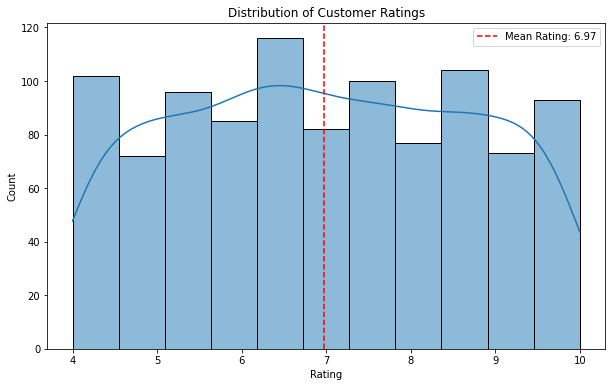

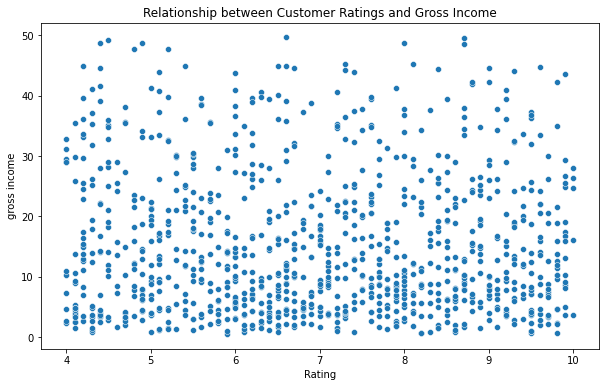

In [106]:
import matplotlib.pyplot as plt

# Load your data (assuming it's named 'data')
# data = pd.read_csv('path_to_your_data.csv')

# Plot distribution of ratings and average rating
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], kde=True)
plt.axvline(x=data['Rating'].mean(), color='red', linestyle='--', label=f"Mean Rating: {data['Rating'].mean():.2f}")
plt.title('Distribution of Customer Ratings')
plt.legend()
plt.show()

# Scatter plot to examine relationship between Ratings and Gross Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='gross income', data=data)
plt.title('Relationship between Customer Ratings and Gross Income')
plt.show()


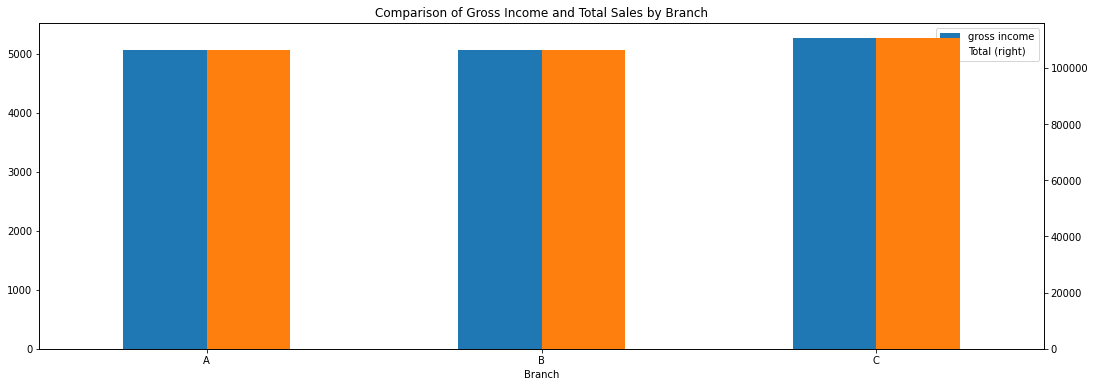

In [107]:
# Sum of gross income and sales per branch
branch_income = data.groupby('Branch').agg({'gross income': 'sum', 'Total': 'sum'})

# Bar plot for comparison
branch_income.plot(kind='bar', secondary_y='Total', figsize=(18, 6), rot=0)
plt.title('Comparison of Gross Income and Total Sales by Branch')
plt.show()


In [108]:
branch_income

,gross income,Total
Branch,,
A,5057.1605,106200.3705
B,5057.0320,106197.6720
C,5265.1765,110568.7065


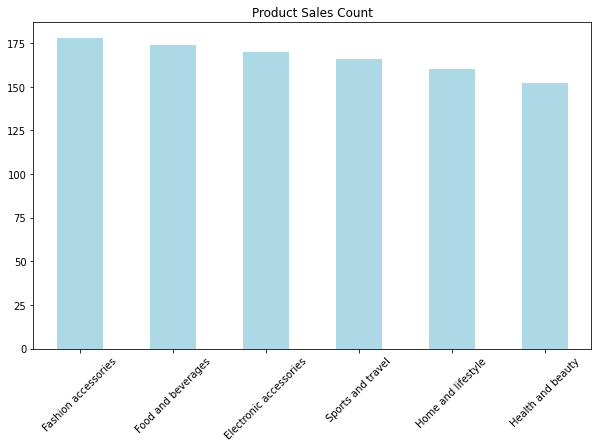

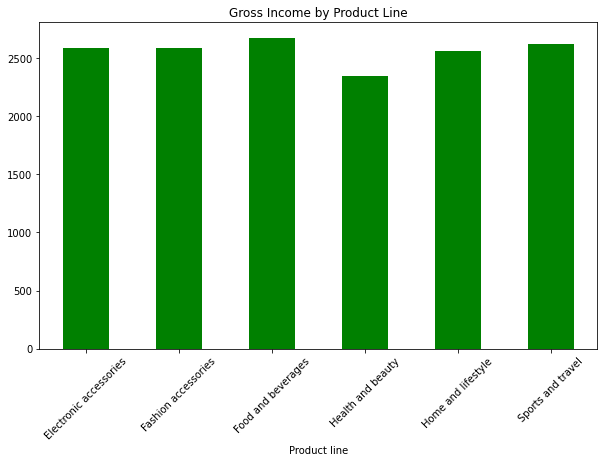

In [109]:
# Count of products sold
product_counts = data['Product line'].value_counts()

# Sum of gross income per product line
product_income = data.groupby('Product line')['gross income'].sum()

# Bar plot for product counts
product_counts.plot(kind='bar', figsize=(10, 6), color='lightblue', rot=45)
plt.title('Product Sales Count')
plt.show()

# Bar plot for gross income by product
product_income.plot(kind='bar', figsize=(10, 6), color='green', rot=45)
plt.title('Gross Income by Product Line')
plt.show()


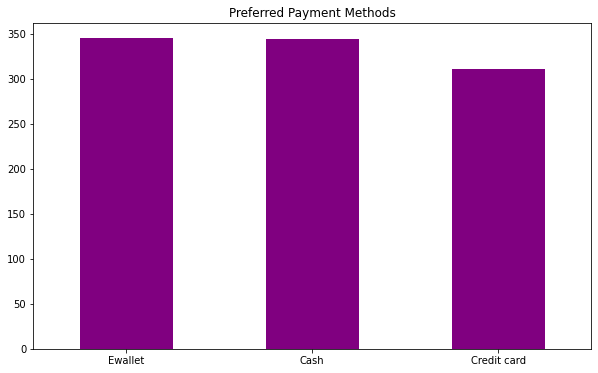

In [110]:
# Count of each payment method
payment_counts = data['Payment'].value_counts()

# Bar plot for payment methods
payment_counts.plot(kind='bar', figsize=(10, 6), color='purple', rot=0)
plt.title('Preferred Payment Methods')
plt.show()


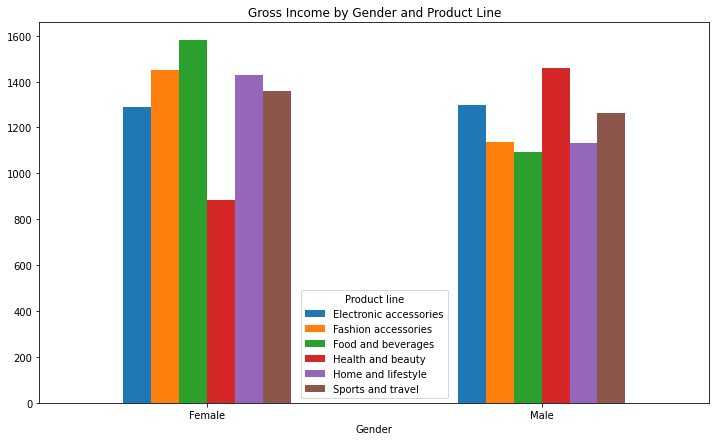

In [111]:
# Gross income by gender and product line
gender_product_income = data.groupby(['Gender', 'Product line'])['gross income'].sum().unstack()

# Bar plot for gross income by gender and product line
gender_product_income.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Gross Income by Gender and Product Line')
plt.show()


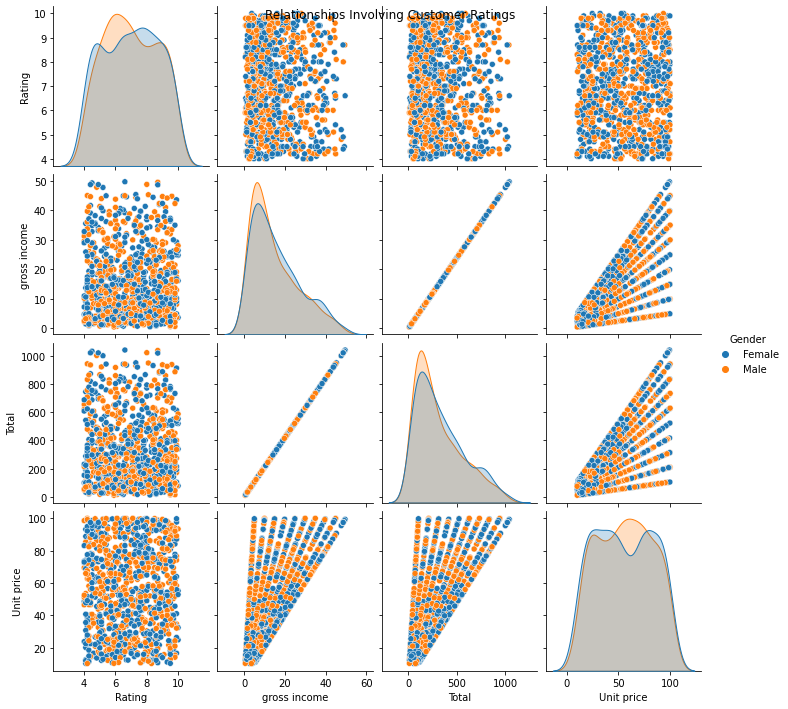

In [112]:
# Pairplot to explore relationships involving ratings
sns.pairplot(data, vars=['Rating', 'gross income', 'Total', 'Unit price'], hue='Gender')
plt.suptitle('Relationships Involving Customer Ratings', verticalalignment='top')
plt.show()


In [113]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'gross income',
       'Rating', 'Month'],
      dtype='object')

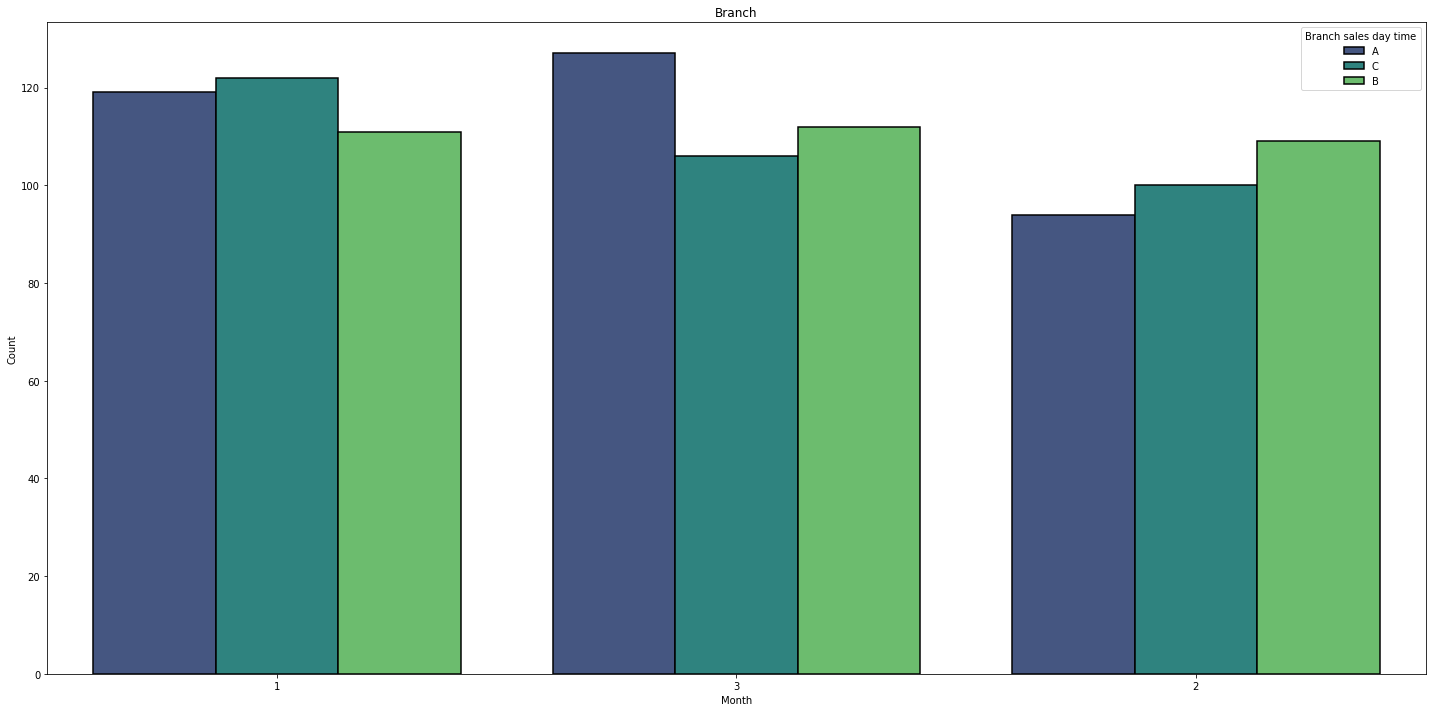

In [114]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'Month', data = data, palette = palette,
              edgecolor = 'black', linewidth = 1.5, hue='Branch', 
              order = data['Month'].value_counts().index)

setup_graph_legend('Branch', 'Month', 'Count', 'Branch sales day time')

plt.tight_layout()
plt.show()

Branch with the most average quantity of selling:
  Branch  Quantity
2      C  5.582317
1      B  5.481928
0      A  5.467647


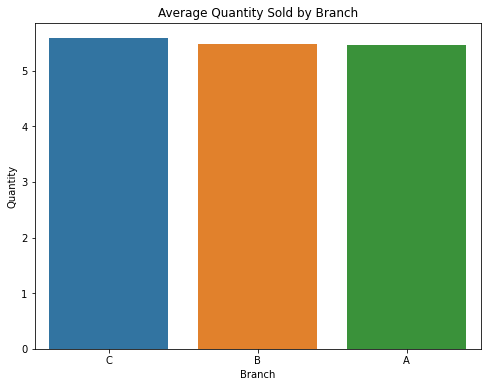

In [115]:
avg_quantity_branch = data.groupby('Branch')['Quantity'].mean().reset_index().sort_values(by='Quantity', ascending=False)

print("Branch with the most average quantity of selling:")
print(avg_quantity_branch)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='Branch', y='Quantity', data=avg_quantity_branch)
plt.title('Average Quantity Sold by Branch')
plt.show()


Most preferable payment method for each customer type:
  Customer type      Payment  counts
1        Member  Credit card     172
5        Normal      Ewallet     184


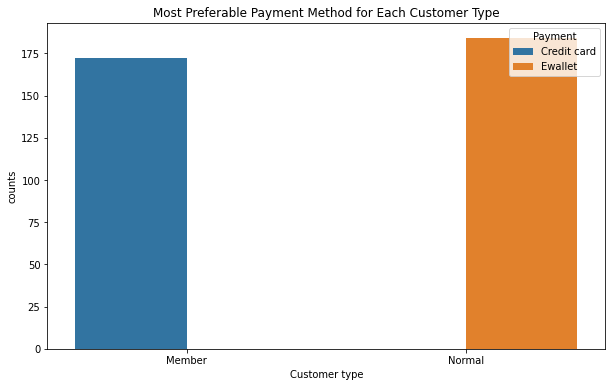

In [116]:
# Most preferable payment method for each customer type
payment_method_customer_type = data.groupby(['Customer type', 'Payment']).size().reset_index(name='counts')
most_preferable_payment = payment_method_customer_type.loc[payment_method_customer_type.groupby('Customer type')['counts'].idxmax()]

print("Most preferable payment method for each customer type:")
print(most_preferable_payment)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer type', y='counts', hue='Payment', data=most_preferable_payment)
plt.title('Most Preferable Payment Method for Each Customer Type')
plt.show()


In [119]:
gender_product_line = data.groupby(['Gender', 'Product line']).size().reset_index(name='Count') 
gender_product_line

,Gender,Product line,Count
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79
5,Female,Sports and travel,88
6,Male,Electronic accessories,86
7,Male,Fashion accessories,82
8,Male,Food and beverages,84
9,Male,Health and beauty,88


In [126]:
import plotly.express as px

In [127]:
px.pie(gender_product_line ,values='Count',names='Product line',hover_data=['Gender'],title='Number of Sales by Gender and Product Line',color_discrete_sequence=px.colors.sequential.RdBu)

In [131]:
customer_payment = data.groupby(['Customer type', 'Payment'])['Total'].sum().reset_index()
customer_payment 

,Customer type,Payment,Total
0,Member,Cash,54661.0155
1,Member,Credit card,57771.4725
2,Member,Ewallet,51790.9560
3,Normal,Cash,57545.5545
4,Normal,Credit card,42995.5995
5,Normal,Ewallet,58202.1510


In [132]:

px.bar(customer_payment, x='Customer type', y='Payment', color='Total', title='Total Sales by Customer Type and Payment Method')

In [134]:
product_line_quantity = data.groupby('Product line')['Quantity'].sum().reset_index()
product_line_quantity

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


In [135]:
px.pie(product_line_quantity, values='Quantity', names='Product line',title='Total Quantity Sold by Product Line',color_discrete_sequence=px.colors.sequential.RdBu)

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

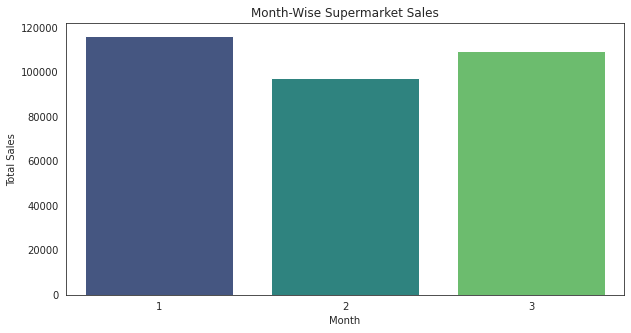

Sales by branch: Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64
Product line sales by branch: Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
A                         18317.1135           16332.5085          17163.1005   
B                         17051.4435           16413.3165          15214.8885   
C                         18968.9745           21560.0700          23766.8550   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
A                     12597.753          22417.1955         19372.6995  
B                     19980.660          17549.1645         19988.1990  
C                     16615.326          13895.5530         15761.9280  


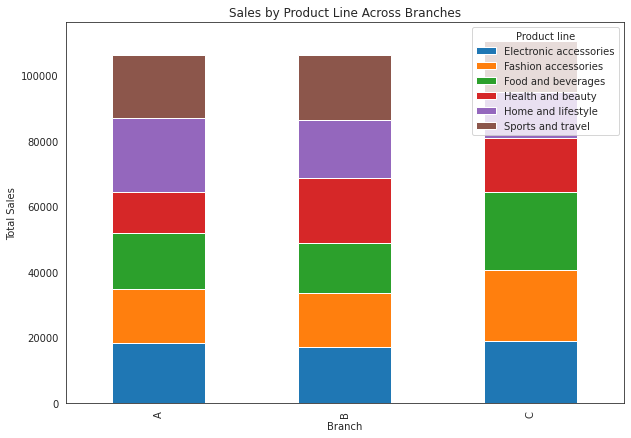

In [136]:
# Load the dataset
data = pd.read_csv("../input/supermarket-sales/supermarket_sales - Sheet1.csv")
print(data.head())

# Set visualization style
sns.set_style("white")

# Columns and their descriptions
column_descriptions = {
    "Invoice ID": "Represents the order ID.",
    "Branch": "Branch of the supermarket, same as city.",
    "City": "City of the supermarket.",
    "Customer type": "Type of customer (member or non-member).",
    "Product line": "Type of product category.",
    "Unit price": "Price of a single unit.",
    "Quantity": "Quantity of ordered product.",
    "Tax 5%": "Tax on order.",
    "Total": "Total value of order.",
    "Date": "Order date.",
    "Time": "Time of day for order.",
    "Payment": "Mode of payment.",
    "cogs": "Cost of goods sold.",
    "gross margin percentage": "Profit margin of the order.",
    "gross income": "Total profit of the order.",
    "Rating": "Customer rating received."
}

# Dataframe structure
print(data.info())

# Statistical description of numerical columns
print(data.describe())

# Check for NaN values in the dataset
print(data.isna().any())

# Month-wise sales analysis
data['Month'] = pd.to_datetime(data['Date']).dt.month
month_sales = data.groupby('Month')['Total'].sum()
print("Month-wise sales:", month_sales)

# Visualize Month-wise supermarket sales
plt.figure(figsize=(10, 5))
sns.barplot(x=month_sales.index, y=month_sales.values, palette="viridis")
plt.title('Month-Wise Supermarket Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Analysis of sales by branches
branch_sales = data.groupby('Branch')['Total'].sum()
print("Sales by branch:", branch_sales)

# Detailed examination of product lines across branches
branch_product_sales = data.groupby(['Branch', 'Product line'])['Total'].sum().unstack()
print("Product line sales by branch:", branch_product_sales)

# Visualize the sales by product line in each branch
branch_product_sales.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sales by Product Line Across Branches')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()


Text(0.5, 1.0, 'Production lines within months')

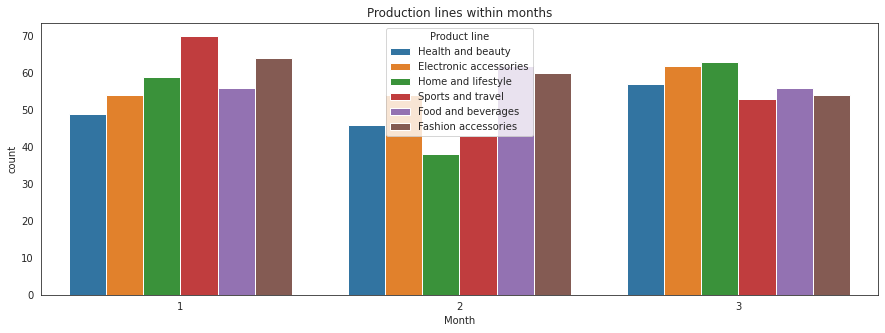

In [141]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Month',data=data,hue='Product line')
plt.title('Production lines within months')

In [142]:
figure=px.box(data,x='Product line',color='Product line',y='gross income',template='plotly_dark',title='Product line with gross income')
figure.show()